___
### IMPORTS

In [ ]:
# Modules used for data handling / test
import pickle


# Modules used for EDA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Modules used for ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import tensorflow as tf

from sklearn.utils import shuffle
from tensorflow import keras
from utils import c_matrix_bin, model_scoring_classification, model_scoring_regression


from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from skimage.io import imread

import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

In [153]:
# Modules settings
%matplotlib inline

sns.set_theme(style='whitegrid', rc={'figure.figsize': (20, 10)})

In [ ]:
### TODO ### Import a class from a module

# For a better pd.DataFrame visualization
class display(object):
    '''This class was found in 'Python Data Science Handbook' by jakevdp (Jake Vanderplas),
    which you can access though his GitHub repository
    (https://github.com/jakevdp/PythonDataScienceHandbook)'''
    
    template = '''<div style="float: left; padding: 10px;">
                  <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
                  </div>'''
    
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_()) for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a)) for a in self.args)

___
### UPDATE UTILS

In [155]:
# This cell only needs to be executed to update utils
# if modified after been imported

%run utils

___
### GETTING DATASET

In [156]:
with open('./data/clean_data', 'rb') as file:
    museum = pickle.load(file)
        
    X = pickle.load(file)
    y_artist = pickle.load(file)
    y_group = pickle.load(file)
    
    X_artist_over = pickle.load(file)
    y_artist_over = pickle.load(file)
    X_group_over = pickle.load(file)
    y_group_over = pickle.load(file)
    
    X_artist_under = pickle.load(file)
    y_artist_under = pickle.load(file)
    X_group_under = pickle.load(file)
    y_group_under = pickle.load(file)

___
### TRAIN/TEST SPLIT

In [157]:
# Define target tags
groups = ['classic', 'vanguards']
artists = ['caravaggio', 'degas', 'goya', 'hokusai', 'kahlo',
           'kandinsky', 'klimt', 'lichtenstein', 'mondrian', 'monet',
           'picasso', 'pollock', 'sorolla', 'velazquez', 'warhol']

In [158]:
# Generate train/test data (25%)
# Rename variables for easier handling
X0_train, X0_test, y0_train, y0_test = train_test_split(X,
                                                        y_group,
                                                        test_size=.25,
                                                        random_state=42)

X1_train, X1_test, y1_train, y1_test = train_test_split(X_group_over,
                                                        y_group_over,
                                                        test_size=.25,
                                                        random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(X_group_under,
                                                        y_group_under,
                                                        test_size=.25,
                                                        random_state=42)

X3_train, X3_test, y3_train, y3_test = train_test_split(X,
                                                        y_artist,
                                                        test_size=.25,
                                                        random_state=42)

X4_train, X4_test, y4_train, y4_test = train_test_split(X_artist_over,
                                                        y_artist_over,
                                                        test_size=.25,
                                                        random_state=42)

X5_train, X5_test, y5_train, y5_test = train_test_split(X_artist_under,
                                                        y_artist_under,
                                                        test_size=.25,
                                                        random_state=42)

___
### MODEL SELECTION:

**SUPERVISED MODELS:**

*~~LINEAR REGRESION~~*  
*~~POLYNOMIAL REGRESION~~*  
LOGISTIC REGRESION with museum_data (MD0, MD1, MD2)  
DECISION TREE with museum_data (MD3, MD4, MD5)  
*~~KNN~~*  
*~~SVM~~*  


**NON SUPERVISED MODELS:**  

*~~PCA~~*  
KMEANS with raw_images used to build museum_img dataset  
*~~NEURAL NETWORK with museum_img~~*  
CONVOLUTIONAL NEURAL NETWORK with museum_img  

In [8]:
# # Optimización de hiperparámetros para cada modelo utilizando GridSearchCV

# # REGRESION LOGISTICA
# grid_logreg = {"penalty": ["l1","l2"],    # Regularizaciones L1 y L2.
#                "C": [0.1, 0.5, 1.0, 5.0], # Cuanta regularizacion queremos
#                "max_iter": [50,100,500],  # Iteraciones del Gradient Descent. No suele impactar mucho
#                                           # pero en ocasiones aparecen warnings diciendo que se aumente
#                "solver": ["liblinear"]}   # Suele ser el más rápido

# # KNN
# grid_neighbors = {"n_neighbors": [3,5,7,9,11],       # Pares acepta sklearn, pero se suele poner impares, por los empates
#                   "weights": ["uniform","distance"]} # Ponderar o no las clasificaciones en 
#                                                      # función de la inversa de la distancia a cada vecino

# # ARBOL DE DECISION
# grid_arbol = {"max_depth":list(range(1,10))} # Profundidades del árbol. Cuanto más profundo, mas posibilidades de overfitting,
#                                              # pero  mas preciso en entrenamiento.

# # RANDOM FOREST
# grid_random_forest = {"n_estimators": [120],          # El Random Forest no suele empeorar por exceso de
#                                                       # estimadores. A partir de cierto numero no merece la pena
#                                                       # perder el tiempo ya que no mejora mucho más la precisión.
#                                                       # Entre 100 y 200 es una buena cifra
#                      "max_depth": [3,4,5,6,10,15,17], # No le afecta tanto el overfitting como al decissiontree.
#                                                       # Podemos probar mayores profundidades
#                      "max_features": ["sqrt", 3, 4]}  # Numero de features que utiliza en cada split.
#                                                       # cuanto más bajo, mejor generalizará y menos overfitting.

# # SVM
# grid_svm = {"C": [0.01, 0.1, 0.3, 0.5, 1.0, 3, 5.0, 15, 30], # Parametro de regularizacion
#             "kernel": ["linear","poly","rbf"],               # Tipo de kernel, probar varios
#             "degree": [2,3,4,5],                             # Cuantos grados queremos para el kernel polinomico
#             "gamma": [0.001, 0.1, "auto", 1.0, 10.0, 30.0]}  # Coeficiente de regulaizacion para los kernels rbf, poly y sigmoid

# # GRADIENT BOOSTING
# grid_gradient_boosting = {"loss": ["deviance"],                         # Deviance suele ir mejor.
#                           "learning_rate": [0.05, 0.1, 0.2, 0.4, 0.5],  # Cuanto más alto, mas aporta cada nuevo arbol
#                           "n_estimators": [20,50,100,200],              # Cuidado con poner muchos estiamdores ya que vamos a
#                                                                         # sobreajustar el modelo
#                           "max_depth": [1,2,3,4,5],                     # No es necesario poner una profundiad muy alta. Cada nuevo
#                                                                         # arbol va corrigiendo el error de los anteriores.
#                           "max_features": ["sqrt", 3, 4]}               # Igual que en el random forest

___
### LOGISTIC REGRESION (MD0, MD1, MD2)

In [159]:
# Instance model
model_logreg0 = LogisticRegression()
model_logreg1 = LogisticRegression()
model_logreg2 = LogisticRegression()

# Fit model
model_logreg0.fit(X0_train, y0_train)
model_logreg1.fit(X1_train, y1_train)
model_logreg2.fit(X2_train, y2_train)

LogisticRegression()

In [160]:
# Predict
preds0 = model_logreg0.predict(X0_test)
preds1 = model_logreg1.predict(X1_test)
preds2 = model_logreg2.predict(X2_test)

preds_proba0 = model_logreg0.predict_proba(X0_test)
preds_proba1 = model_logreg1.predict_proba(X1_test)
preds_proba2 = model_logreg2.predict_proba(X2_test)

In [161]:
# Evaluate model_logreg0 performance
model_scoring_classification('model_logreg0', model_logreg0, X0_train, y0_train, set='train')

,MODEL_LOGREG0 (train data)
Accuracy (TP + TN/TT),0.6699875467
Precision (TP/TP + FP),0.6374501992
Recall (TP/TP + FN),0.2671118531
"F1 (har_mean Ac, Re)",0.3764705882
ROC AUC,0.5883722125


In [162]:
# Evaluate model_logreg0 performance
model_scoring_classification('model_logreg0', model_logreg0, X0_test, y0_test, set='test')

,MODEL_LOGREG0 (test data)
Accuracy (TP + TN/TT),0.6610644258
Precision (TP/TP + FP),0.5810810811
Recall (TP/TP + FN),0.2222222222
"F1 (har_mean Ac, Re)",0.3214953271
ROC AUC,0.5657894737


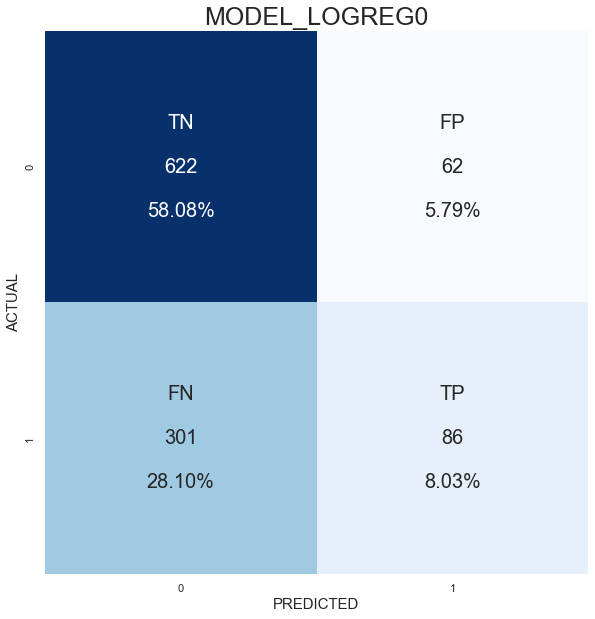

In [163]:
# Evaluate model_logreg0 performance
c_matrix_bin('model_logreg0', y0_test, preds0);

In [164]:
# Evaluate model_logreg1 performance
model_scoring_classification('model_logreg1', model_logreg1, X1_train, y1_train, set='train')

,MODEL_LOGREG1 (train data)
Accuracy (TP + TN/TT),0.6278724981
Precision (TP/TP + FP),0.6448087432
Recall (TP/TP + FN),0.5795677800
"F1 (har_mean Ac, Re)",0.6104500776
ROC AUC,0.6281727512


In [165]:
# Evaluate model_logreg1 performance
model_scoring_classification('model_logreg1', model_logreg1, X1_test, y1_test, set='test')

,MODEL_LOGREG1 (test data)
Accuracy (TP + TN/TT),0.6345441067
Precision (TP/TP + FP),0.6369529984
Recall (TP/TP + FN),0.5936555891
"F1 (har_mean Ac, Re)",0.6145426114
ROC AUC,0.6338001381


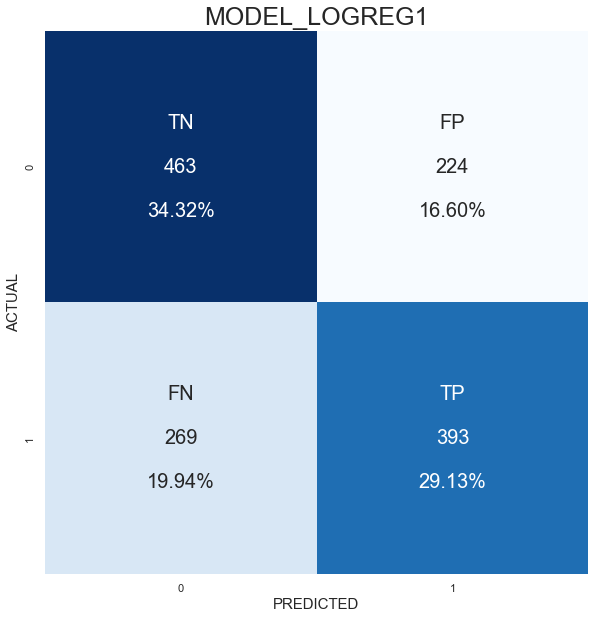

In [166]:
# Evaluate model_logreg1 performance
c_matrix_bin('model_logreg1', y1_test, preds1);

In [167]:
# Evaluate model_logreg2 performance
model_scoring_classification('model_logreg2', model_logreg2, X2_train, y2_train, set='train')

,MODEL_LOGREG2 (train data)
Accuracy (TP + TN/TT),0.6318889356
Precision (TP/TP + FP),0.6470078057
Recall (TP/TP + FN),0.6144975288
"F1 (har_mean Ac, Re)",0.6303337558
ROC AUC,0.6322702605


In [168]:
# Evaluate model_logreg2 performance
model_scoring_classification('model_logreg2', model_logreg2, X2_test, y2_test, set='test')

,MODEL_LOGREG2 (test data)
Accuracy (TP + TN/TT),0.6179066835
Precision (TP/TP + FP),0.5944444444
Recall (TP/TP + FN),0.5768194070
"F1 (har_mean Ac, Re)",0.5854993160
ROC AUC,0.6154239215


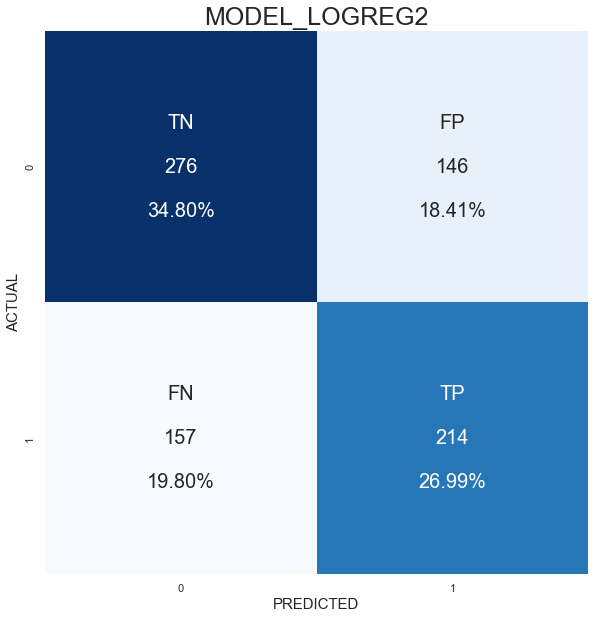

In [169]:
# Evaluate model_logreg2 performance
c_matrix_bin('model_logreg2', y2_test, preds2);

___
### DECISSION TREE (MD3, MD4, MD5, EXTRA - MD0)

In [173]:
# Instance model
model_tree3 = DecisionTreeClassifier(random_state=42)
model_tree4 = DecisionTreeClassifier(random_state=42)
model_tree5 = DecisionTreeClassifier(random_state=42)

# Fit model
model_tree3.fit(X0_train, y0_train)
model_tree4.fit(X1_train, y1_train)
model_tree5.fit(X2_train, y2_train)

DecisionTreeClassifier(random_state=42)

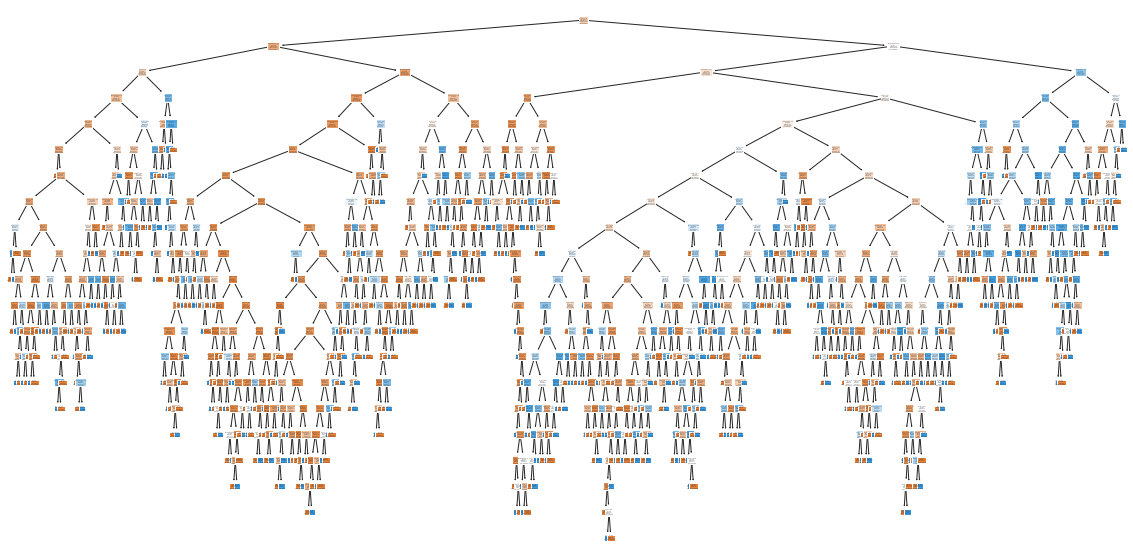

In [174]:
# Model_tree3 viz
plot_tree(model_tree3,
          feature_names=X3_train.columns,
          class_names=artists,
          filled=True);

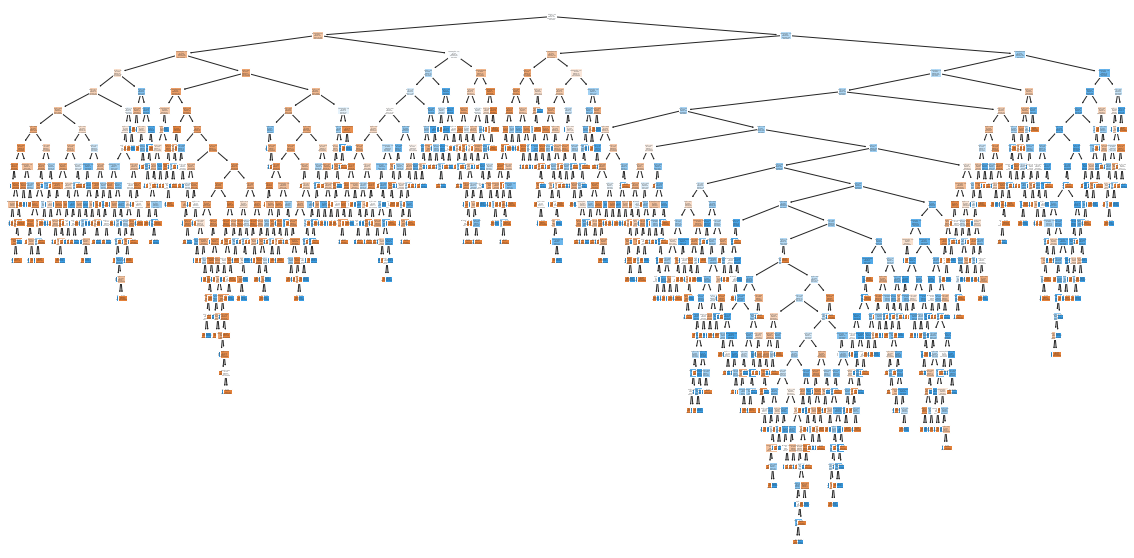

In [175]:
# Model_tree4 viz
plot_tree(model_tree4,
          feature_names=X4_train.columns,
          class_names=artists,
          filled=True);

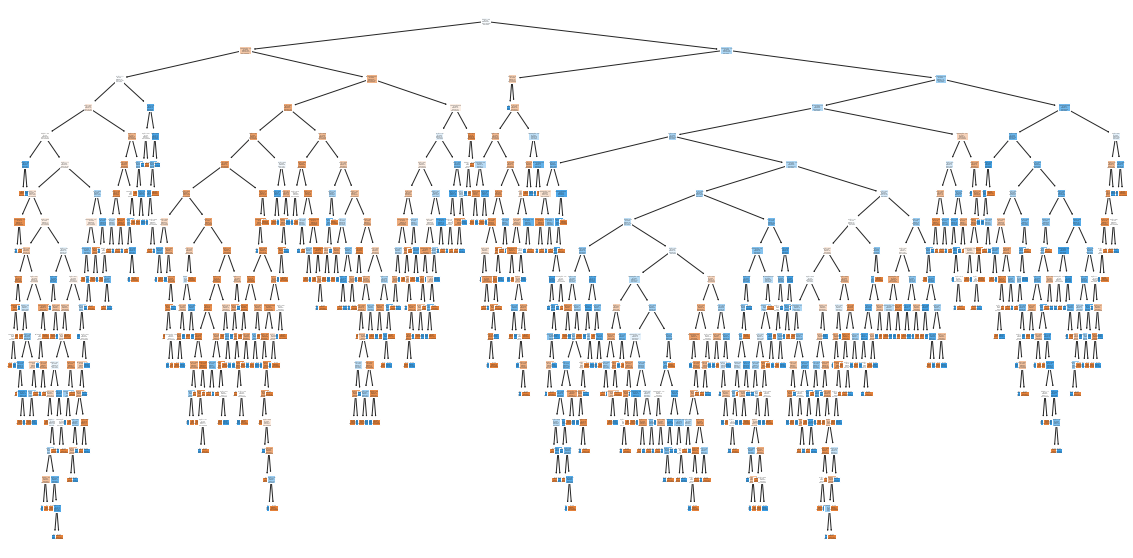

In [176]:
# Model_tree5 viz
plot_tree(model_tree5,
          feature_names=X5_train.columns,
          class_names=artists,
          filled=True);

In [177]:
# Predict
preds3 = model_tree3.predict(X3_test)
preds4 = model_tree4.predict(X4_test)
preds5 = model_tree5.predict(X5_test)

preds_proba3 = model_tree3.predict_proba(X3_test)
preds_proba4 = model_tree4.predict_proba(X4_test)
preds_proba5 = model_tree5.predict_proba(X5_test)

In [178]:
print("AC model_tree3 train", model_tree3.score(X3_train, y3_train))
print("AC model_tree3 test", model_tree3.score(X3_test, y3_test), '\n')

print("AC model_tree4 train", model_tree4.score(X4_train, y4_train))
print("AC model_tree4 test", model_tree4.score(X4_test, y4_test), '\n')

print("AC model_tree5 train", model_tree5.score(X3_train, y3_train))
print("AC model_tree5 test", model_tree5.score(X3_test, y3_test))

AC model_tree3 train 0.019302615193026153
AC model_tree3 test 0.07096171802054155 

AC model_tree4 train 0.06446156737455365
AC model_tree4 test 0.07074408117249155 

AC model_tree5 train 0.045454545454545456
AC model_tree5 test 0.0457516339869281


___

Can we improve the performance? Let's cut some leaves!

In [179]:
# Instance model
model_tree3 = DecisionTreeClassifier(random_state=42, min_samples_leaf=10, max_depth=10)
model_tree4 = DecisionTreeClassifier(random_state=42, min_samples_leaf=10, max_depth=10)
model_tree5 = DecisionTreeClassifier(random_state=42, min_samples_leaf=10, max_depth=10)

# Fit model
model_tree3.fit(X0_train, y0_train)
model_tree4.fit(X1_train, y1_train)
model_tree5.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42)

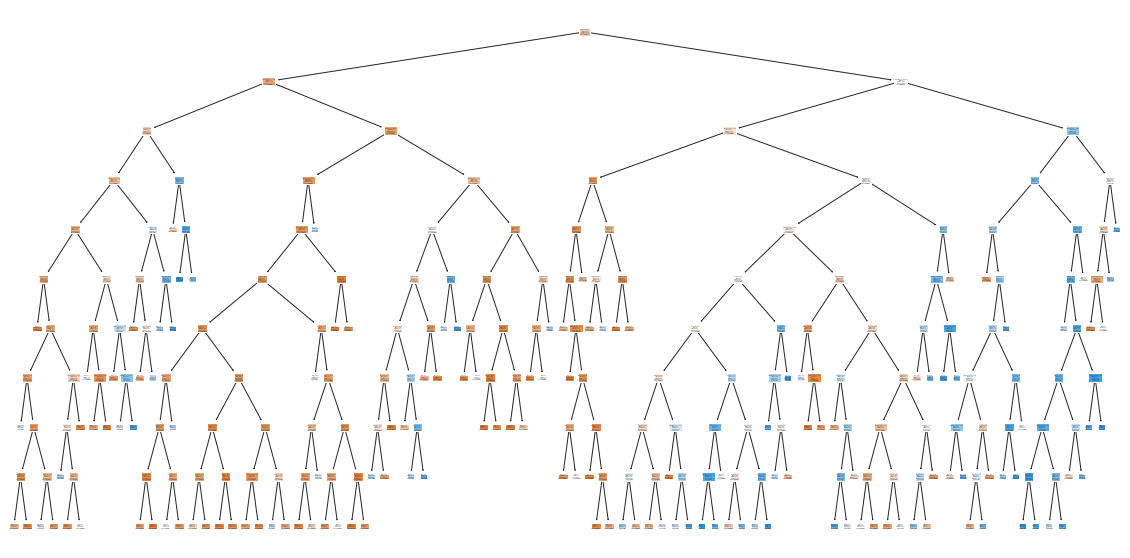

In [180]:
# Model_tree3 viz
plot_tree(model_tree3,
          feature_names=X3_train.columns,
          class_names=artists,
          filled=True);

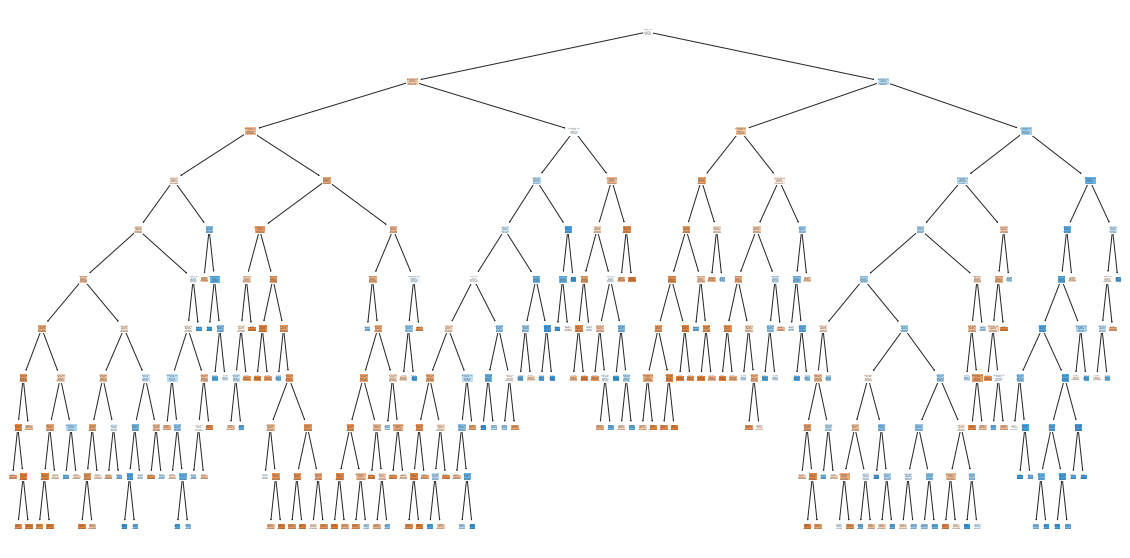

In [181]:
# Model_tree4 viz
plot_tree(model_tree4,
          feature_names=X4_train.columns,
          class_names=artists,
          filled=True);

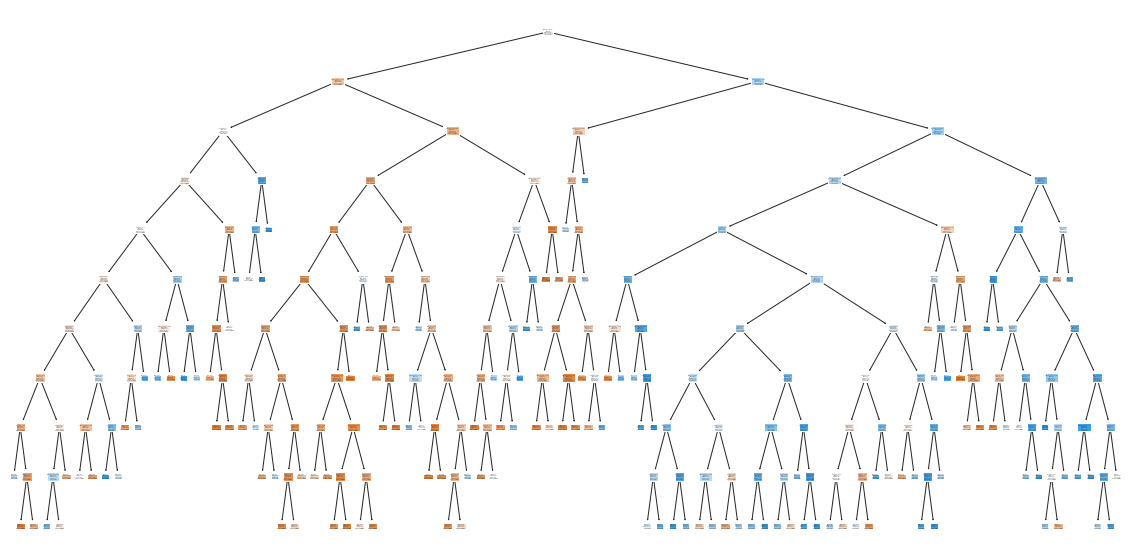

In [182]:
# Model_tree5 viz
plot_tree(model_tree5,
          feature_names=X5_train.columns,
          class_names=artists,
          filled=True);

In [183]:
# Predict
preds3 = model_tree3.predict(X3_test)
preds4 = model_tree4.predict(X4_test)
preds5 = model_tree5.predict(X5_test)

preds_proba3 = model_tree3.predict_proba(X3_test)
preds_proba4 = model_tree4.predict_proba(X4_test)
preds_proba5 = model_tree5.predict_proba(X5_test)

In [184]:
print("AC model_tree3 train", model_tree3.score(X3_train, y3_train))
print("AC model_tree3 test", model_tree3.score(X3_test, y3_test), '\n')

print("AC model_tree4 train", model_tree4.score(X4_train, y4_train))
print("AC model_tree4 test", model_tree4.score(X4_test, y4_test), '\n')

print("AC model_tree5 train", model_tree5.score(X3_train, y3_train))
print("AC model_tree5 test", model_tree5.score(X3_test, y3_test))

AC model_tree3 train 0.03891656288916563
AC model_tree3 test 0.06722689075630252 

AC model_tree4 train 0.07733508738958843
AC model_tree4 test 0.08258173618940248 

AC model_tree5 train 0.059153175591531756
AC model_tree5 test 0.0700280112044818


___

Well.. not too much improvement. What about MD0?

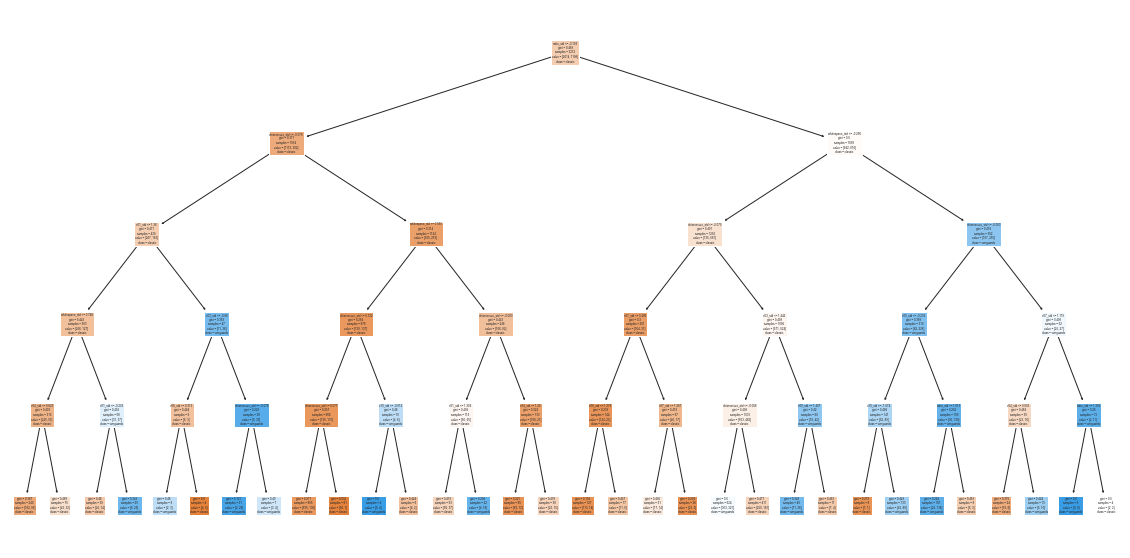

In [191]:
# Instance model
model_tree0 = DecisionTreeClassifier(random_state=42, min_samples_leaf=4, max_depth=5)

# Fit model
model_tree0.fit(X0_train, y0_train)

# Model_tree0 viz
plot_tree(model_tree0,
          feature_names=X0_train.columns,
          class_names=groups,
          filled=True);

In [192]:
# Predict
preds0 = model_tree0.predict(X0_test)

preds_proba0 = model_tree0.predict_proba(X0_test)

In [193]:
print("AC model_tree0 train", model_tree0.score(X0_train, y0_train))
print("AC model_tree0 test", model_tree0.score(X0_test, y0_test))

AC model_tree0 train 0.7132627646326276
AC model_tree0 test 0.6750700280112045


In [194]:
# Evaluate model_tree0 performance
model_scoring_classification('model_tree0', model_tree0, X0_train, y0_train, set='train')

,MODEL_TREE0 (train data)
Accuracy (TP + TN/TT),0.7132627646
Precision (TP/TP + FP),0.6271808999
Recall (TP/TP + FN),0.5701168614
"F1 (har_mean Ac, Re)",0.5972890249
ROC AUC,0.6842639918


In [195]:
# Evaluate model_tree0 performance
model_scoring_classification('model_tree0', model_tree0, X0_test, y0_test, set='test')

,MODEL_TREE0 (test data)
Accuracy (TP + TN/TT),0.6750700280
Precision (TP/TP + FP),0.5582089552
Recall (TP/TP + FN),0.4832041344
"F1 (har_mean Ac, Re)",0.5180055402
ROC AUC,0.6334149327


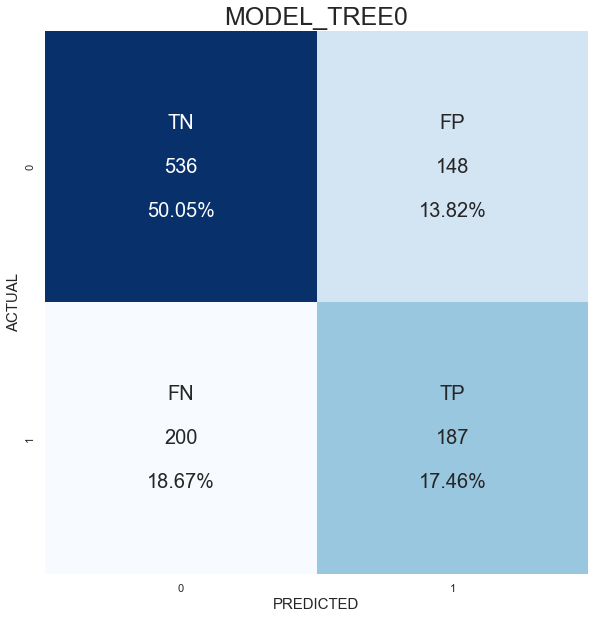

In [196]:
c_matrix_bin('model_tree0', y0_test, preds0);

___
### CONVOLUTIONAL NEURAL NETWORK

In [214]:
# Previous tranformations
# IMG_ID are not int64 type but object type, so I'll cast it
museum['img_ID'] = museum['img_ID'].astype(str, errors='ignore')

In [198]:
IMG_HEIGHT=32
IMG_WIDTH=32
IMG_CHANNELS=3
IMG_SIZE=(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)
BATCH_SIZE = 10
EPOCHS = 5

In [344]:
def img_train_test_split(DataFrame,
                         target='',
                         path='',
                         extensions=[],
                         test_percentage=20,
                         px=50,
                         norm=True,
                         random_state=42):

    # Fix seed for random selection
    if random_state:
        np.random.RandomState(random_state)
    
    # Capture
    files = get_collection(path, extensions=extensions)

    # Turn paths into strings
    files = [str(file) for file in files]
    
    # Check if file in in museum
    names = list(DataFrame['img_ID'])
    
    files = [str(file) for file in files if file.split(sep='/')[-1].split(sep='.')[0] in names]
        
    # Train/test selection with test_percentage of the images
    test_size = (len(files) * test_percentage) // 100
    test_files = np.random.choice(files, size=test_size)
    train_files = [file for file in files if file not in test_files]

    # Get img_ID
    test_filenames = [file.split(sep='/')[-1].split(sep='.')[0] for file in test_files]
    train_filenames = [file.split(sep='/')[-1].split(sep='.')[0] for file in train_files]
    
    X_train = []
    X_test = []

    for train_file in train_files:
        train_img = imread(train_file)
        train_img_mini = cv2.resize(train_img, (px, px))
       
        X_train.append(train_img_mini)
        
    for test_file in test_files:
        test_img = imread(test_file)
        test_img_mini = cv2.resize(test_img, (px, px))
        
        X_test.append(test_img_mini)
        
    y_train = []
    y_test = []
    
    for train_filename in train_filenames:
        try:
            target = DataFrame[target][DataFrame['img_ID'] == train_filename]     
            y_train.append(target)
        except:
            y_train.append(0)
            
    for test_filename in test_filenames:
        try:
            target = DataFrame[target][DataFrame['img_ID'] == test_filename]
            y_test.append(target)
        except:
            y_test.append(target)
            
    X_train = np.asarray(X_train).astype('float32')
    X_test = np.asarray(X_test).astype('float32')
    y_train = np.asarray(y_train).astype('int').reshape(-1,1)
    y_test = np.asarray(y_test).astype('int').reshape(-1,1)
    
    # Normalize
    if norm:
        X_train = X_train / 255.0
        X_test = X_test / 255.0
        
    return X_train, X_test, y_train, y_test

In [345]:
# def img_train_test_split(DataFrame,
#                          target='',
#                          path='',
#                          extensions=[],
#                          test_percentage=20,
#                          px=50,
#                          norm=True,
#                          random_state=42):

#     # Fix seed for random selection
#     if random_state:
#         np.random.RandomState(random_state)
    
#     # Capture
#     files = get_collection(path, extensions=extensions)

#     # Turn paths into strings
#     files = [str(file) for file in files]

#     # Check if file in in museum
#     names = list(DataFrame['img_ID'])    
#     files = [str(file) for file in files if file.split(sep='/')[-1].split(sep='.')[0] in names]

#     # Get img_ID
#     filenames = [file.split(sep='/')[-1].split(sep='.')[0] for file in files]
    
#     X = []

#     for file in files:
#         img = imread(file)
#         img_mini = cv2.resize(img, (px, px))
       
#         X.append(img_mini)
        
#     y = []
    
#     for filename in filenames:
#         target = DataFrame[target][DataFrame['img_ID'] == filename]     
#         y.append(target)
            
#     X = np.asarray(X_train).astype('float32')
#     y = np.asarray(y_train).astype('int').reshape((-1,1))
    
#     # Normalize
#     if norm:
#         X = X / 255.0
        
#     return X, y

In [332]:
X, y = shuffle(X, y, random_state=42)

((3513, 32, 32, 3), (857, 32, 32, 3), (3513, 1), (857, 1))

In [346]:
# Get images, resize, shuffle train/test split and normalize
X_train, X_test, y_train, y_test = img_train_test_split(museum,
                                                        target='artist_enc',
                                                        path='./images/big_museum',
                                                        extensions=['.jpg'],
                                                        test_percentage=20,
                                                        px=32,
                                                        norm=True,
                                                        random_state=42)

/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [347]:
# Get images, resize, shuffle train/test split and normalize
X1_train, X1_test, y1_train, y1_test = img_train_test_split(museum,
                                                            target='group',
                                                            path='./images/big_museum',
                                                            extensions=['.jpg'],
                                                            test_percentage=20,
                                                            px=32,
                                                            norm=True,
                                                            random_state=42)

In [349]:
# Instance model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3,3),
                 activation='relu',
                 input_shape=(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())

# Dense layers
model.add(Dense(512,
                activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(15,
                activation='softmax')) 

# Compiler
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [350]:
# Fit
history = model.fit(X_train,
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2)

Epoch 1/5


ValueError: in user code:

    File "/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_12" is incompatible with the layer: expected shape=(None, 50, 50, 3), found shape=(10, 32, 32, 3)


In [351]:
# Instance model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3,3),
                 activation='relu',
                 input_shape=(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())

# Dense layers
model.add(Dense(512,
                activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1,
                activation='sigmoid')) 

# Compiler
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [352]:
# Fit
history = model.fit(X1_train,
                    y1_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2)

Epoch 1/5


ValueError: in user code:

    File "/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_13" is incompatible with the layer: expected shape=(None, 50, 50, 3), found shape=(None, 32, 32, 3)


In [ ]:
# Plot fit performance
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [ ]:
# Evaluate
results = model.evaluate(X_test, y_test)
print("test loss, test accuracy",results)

In [ ]:
# Check predictions
plt.imshow(X_test[320]);

# Fit transformation
np.expand_dims(X_test[320], axis=0).shape
model.predict(X_test[320])

In [ ]:

X_test[0].shape
np.expand_dims(X_test[0], axis=0).shape
model.predict(np.expand_dims(X_test[0], axis=0))
plt.imshow(X_test[5]);
model.predict(np.expand_dims(X_test[5],axis=0))

___
### EXPORT DATA

In [ ]:
np.savez('tt_split.npz',
         X_train=X_train,
         X_test=X_test,
         y_train=y_train,
         y_test=y_test)

tt_split = np.load('tt_split.npz')

X_train = tt_split['X_train']
X_test = tt_split['X_test']
y_train = tt_split['y_train']
y_test = tt_split['y_test']